<a href="https://colab.research.google.com/github/Sadia7766/Assignment/blob/main/SM_assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ID: 2215151033

**Question:**

Generate two sets of from a normal distribution and perform a two-sample t-test.

1.Randomly generate 50 values from a normal distribution with a chosen mean (μ1) and standard deviation.

2.Randomly generate 50 values from a normal distribution with a different mean (μ2) and standard deviation.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [15]:
#Randomly generate 50 values from a normal distribution with a chosen mean (μ1) and standard deviation.
#Randomly generate 50 values from a normal distribution with a different mean (μ2) and standard deviation.

np.random.seed(40)

mu1, sigma1 = 10, 7
mu2, sigma2 = 15, 4

set1 = np.random.normal(mu1, sigma1, 50)
set2 = np.random.normal(mu2, sigma2, 50)

t_statistic, p_value = stats.ttest_ind(set1, set2)

mean_diff = np.mean(set1) - np.mean(set2)
std_err = np.sqrt(np.var(set1, ddof=1)/len(set1) + np.var(set2, ddof=1)/len(set2))
df = (std_err**4) / ((np.var(set1, ddof=1)/len(set1))**2 / (len(set1)-1) + (np.var(set2, ddof=1)/len(set2))**2 / (len(set2)-1))
ci = stats.t.interval(0.95, df, loc=mean_diff, scale=std_err)

# Output the results
print(f"Sample 1 Mean: {np.mean(set1):.2f}")
print(f"Sample 2 Mean: {np.mean(set2):.2f}")
print(f"t-Statistic: {t_statistic:.2f}")
print(f"Degrees of Freedom: {df:.2f}")
print(f"p-Value: {p_value:.4f}")
print(f"Confidence Interval of Mean Difference: [{ci[0]:.2f}, {ci[1]:.2f}]")

Sample 1 Mean: 10.55
Sample 2 Mean: 14.50
t-Statistic: -3.80
Degrees of Freedom: 90.44
p-Value: 0.0002
Confidence Interval of Mean Difference: [-6.02, -1.89]


In [16]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The means of the two sets are significantly different.")
else:
    print("Fail to reject the null hypothesis. The means of the two sets are not significantly different.")

Reject the null hypothesis. The means of the two sets are significantly different.


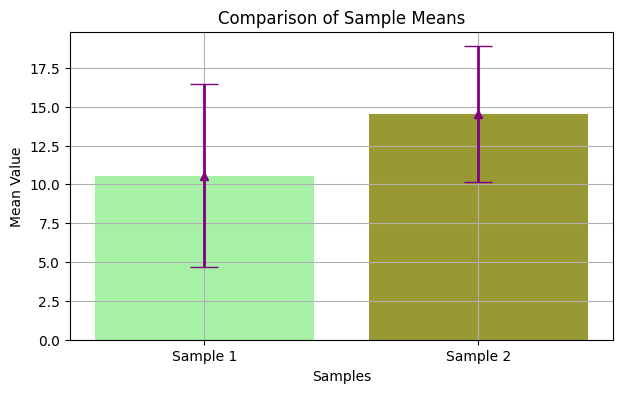

In [37]:
#Visualize the results
plt.figure(figsize=(7, 4))
plt.bar(['Sample 1', 'Sample 2'], [np.mean(set1), np.mean(set2)], color=['lightgreen', 'olive'], alpha=0.8)
plt.errorbar(['Sample 1', 'Sample 2'], [np.mean(set1), np.mean(set2)], yerr=[np.std(set1, ddof=1), np.std(set2, ddof=1)], fmt='^',color='purple', elinewidth=2,capsize=10)
plt.title('Comparison of Sample Means')
plt.xlabel('Samples')
plt.ylabel('Mean Value')
plt.grid(True)
plt.show()